In [250]:
import numpy as np
import matplotlib.pyplot as plt
from hamming_distance_distribution import hamming_distance
from annealing import is_connected, adjacency_from_couplings

In [251]:
def annealing_by_connection(blocksize, fname):

    # read data from file
    data = np.load(fname, allow_pickle=True).item()

    N_blocks = int(data['size']/blocksize)
    N_correct_connected     = np.zeros(N_blocks)
    N_correct_unconnected   = np.zeros(N_blocks)
    N_connected             = np.zeros(N_blocks)
    N_unconnected           = np.zeros(N_blocks)

    for j in range(N_blocks):

        for i in range(blocksize):
            # get annealing results
            J_n         = data["J_n"][j*blocksize + i]
            alpha       = data["alpha"][j*blocksize + i]
            gs_array1   = data["gs_array"][j*blocksize + i]
      
            # classify annealing result
            d_Hamming = hamming_distance(alpha, gs_array1)
            connected = is_connected(adjacency_from_couplings(J_n))

            if connected:
                N_connected[j] += 1
                if d_Hamming==0:
                    N_correct_connected[j] += 1

            if not connected:
                N_unconnected[j] += 1
                if d_Hamming==0:
                    N_correct_unconnected[j] += 1

    return N_correct_connected, N_correct_unconnected, N_connected, N_unconnected


In [252]:
# ---------- Parameters for reading data file -------------
path = "./annealing_data/"

N = 5               # number of users
M = 4               # length of id-sequence for every user
K = 100              # number of antennas
xi = 0              # std of thermal noise

thres_min = 0.08
thres_max = 0.14
thres_step = 0.01

blocksize = 100       # resolution of y axis (equal to N_repeat from other program)

In [253]:
# ---------- Program ----------
N_neglection_thres = int((thres_max-thres_min)/thres_step)+1
data = np.load(path + f"neglection_thres_{thres_min}_N_5_M_4_K_100_xi_0.npy", allow_pickle=True).item()

N_blocks = int(data["size"]/blocksize)
print(f"file includes {data['size']} runs which get split into {N_blocks} blocks of size {blocksize}.")
N_stat = N_blocks

N_correct_connected     = np.zeros(shape=(N_neglection_thres, N_stat))
N_correct_unconnected   = np.zeros(shape=(N_neglection_thres, N_stat))
N_connected             = np.zeros(shape=(N_neglection_thres, N_stat))
N_unconnected           = np.zeros(shape=(N_neglection_thres, N_stat))

neglection_thres = np.zeros(N_neglection_thres)

for i in range(N_neglection_thres):
    neglection_thres[i] = thres_min + i*thres_step
    neglection_thres[i] = np.round(neglection_thres[i], 6)

    fname = path + f"neglection_thres_{neglection_thres[i]}_N_{N}_M_{M}_K_{K}_xi_{xi}.npy"
    print(f"{i}: {fname}")
    result = annealing_by_connection(blocksize, fname)

    N_correct_connected[i]      = result[0]
    N_correct_unconnected[i]    = result[1]
    N_connected[i]              = result[2]
    N_unconnected[i]            = result[3]


200
file includes 200 runs which get split into 2 blocks of size 100.
0: ./annealing_data/neglection_thres_0.08_N_5_M_4_K_100_xi_0.npy
1: ./annealing_data/neglection_thres_0.09_N_5_M_4_K_100_xi_0.npy
2: ./annealing_data/neglection_thres_0.1_N_5_M_4_K_100_xi_0.npy
3: ./annealing_data/neglection_thres_0.11_N_5_M_4_K_100_xi_0.npy
4: ./annealing_data/neglection_thres_0.12_N_5_M_4_K_100_xi_0.npy
5: ./annealing_data/neglection_thres_0.13_N_5_M_4_K_100_xi_0.npy
6: ./annealing_data/neglection_thres_0.14_N_5_M_4_K_100_xi_0.npy


In [254]:
# ratios
if len(np.where(N_connected==0)[0])>0:
    print(f"Division by zero: N_connected   = 0 at {np.where(N_connected==0)}")
if len(np.where(N_unconnected==0)[0])>0:
    print(f"Division by zero: N_unconnected = 0 at {np.where(N_unconnected==0)}")

r_correct_connected     = N_correct_connected   /   N_connected
r_correct_unconnected   = N_correct_unconnected /   N_unconnected

In [255]:
# statistics
r_correct_connected_mean    = np.mean(r_correct_connected, axis=1)
dr_correct_connected        = np.std(r_correct_connected, axis=1)
dr_mean_correct_connected   = dr_correct_connected / np.sqrt(N_stat)

r_correct_unconnected_mean  = np.mean(r_correct_unconnected, axis=1)
dr_correct_unconnected      = np.std(r_correct_unconnected, axis=1)
dr_mean_correct_unconnected = dr_correct_unconnected / np.sqrt(N_stat)

total number of runs per neglection thresold: 100
correct connected: [0.81590946 0.88151184 0.91288566 0.87762238 0.88225399 0.94119198
 0.86083744] +- [0.00305135 0.00264038 0.01283315 0.02225161 0.01427297 0.01212076
 0.04789516], unconnected: [0.98387097 0.91153846 0.91502683 0.89583333 0.99152542 0.88659148
 0.89524648] +- [0.01612903 0.01153846 0.00805009 0.0625     0.00847458 0.01817043
 0.02024648]
(7,)
(7,)


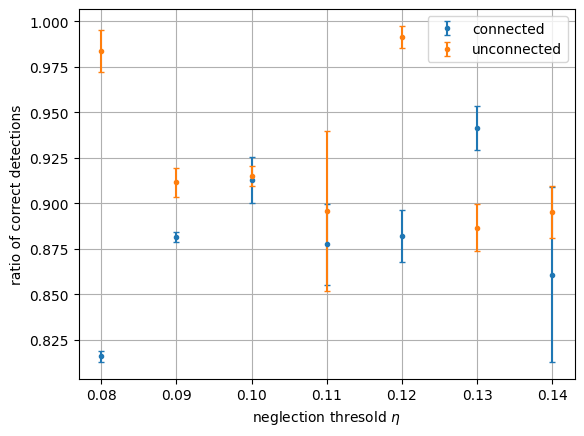

In [256]:
# Results

print(f"total number of runs per neglection thresold: {blocksize}")
print(f"correct connected: {r_correct_connected_mean} +- {dr_mean_correct_connected}, unconnected: {r_correct_unconnected_mean} +- {dr_correct_unconnected}")

# Plotting
print(np.shape(neglection_thres))
print(np.shape(r_correct_connected_mean))
plt.errorbar(x=neglection_thres, y=r_correct_connected_mean, yerr=dr_mean_correct_connected, label="connected", capsize=2, ls="none", marker=".")
plt.errorbar(x=neglection_thres, y=r_correct_unconnected_mean, yerr=dr_mean_correct_unconnected, label="unconnected", capsize=2, ls="none", marker=".")
plt.xlabel(r"neglection thresold $\eta$")
plt.ylabel("ratio of correct detections")
plt.legend()
plt.grid()
plt.show()